## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
# import the necessary packages
from keras.models import Sequential
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [0]:
x_train.shape[0]

60000

### Find dimensions of an image in the dataset

In [0]:
x_train.shape[1:3]

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train,10)

In [0]:
y_test= keras.utils.to_categorical(y_test,10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train =x_train.reshape(x_train.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
import keras
from keras.utils import np_utils


### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

W0714 12:37:44.095228 139695257282432 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

W0714 12:37:53.692458 139695257282432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:

epochs = 10

model.fit(x_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test,y_test))

W0714 12:37:59.768289 139695257282432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.3779 - acc: 0.8658 - val_loss: 0.3329 - val_acc: 0.8821
Epoch 2/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2430 - acc: 0.9122 - val_loss: 0.2907 - val_acc: 0.8953
Epoch 3/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1881 - acc: 0.9309 - val_loss: 0.2929 - val_acc: 0.8938
Epoch 4/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1439 - acc: 0.9465 - val_loss: 0.2687 - val_acc: 0.9112
Epoch 5/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1102 - acc: 0.9603 - val_loss: 0.3035 - val_acc: 0.9106
Epoch 6/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.0847 - acc: 0.9698 - val_loss: 0.3291 - val_acc: 0.9043
Epoch 7/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.0631 - acc: 0.9772 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2 , padding='same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



In [0]:
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [0]:

epochs = 10

model.fit(x_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0462 - acc: 0.9829 - val_loss: 0.3236 - val_acc: 0.9260
Epoch 2/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0416 - acc: 0.9850 - val_loss: 0.3477 - val_acc: 0.9212
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0371 - acc: 0.9863 - val_loss: 0.3312 - val_acc: 0.9241
Epoch 4/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0330 - acc: 0.9880 - val_loss: 0.3660 - val_acc: 0.9266
Epoch 5/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0341 - acc: 0.9878 - val_loss: 0.4022 - val_acc: 0.9236
Epoch 6/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0321 - acc: 0.9886 - val_loss: 0.4223 - val_acc: 0.9218
Epoch 7/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0288 - acc: 0.9900 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

In [0]:
# Create object to transform data
datagen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

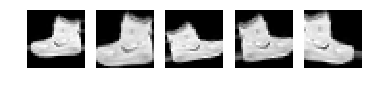

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
datagen_sample=datagen.flow(x_train,y_train)

In [0]:

model.fit_generator(datagen_sample,steps_per_epoch=2000,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.6294 - acc: 0.7701 - val_loss: 0.2911 - val_acc: 0.8944
Epoch 2/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.4631 - acc: 0.8269 - val_loss: 0.2906 - val_acc: 0.8932
Epoch 3/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.4232 - acc: 0.8421 - val_loss: 0.2951 - val_acc: 0.8945
Epoch 4/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.3972 - acc: 0.8513 - val_loss: 0.2827 - val_acc: 0.8998
Epoch 5/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.3806 - acc: 0.8575 - val_loss: 0.2965 - val_acc: 0.8942
Epoch 6/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.3729 - acc: 0.8596 - val_loss: 0.2807 - val_acc: 0.8990
Epoch 7/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.3553 - acc: 0.8682 - val_loss: 0.3187 - val_acc: 0.8887
Epoch 8/10
2000/2000 [==========================

###  Report the final train and validation accuracy

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8983


In [0]:
# Evaluate the model on test set
score = model.evaluate(x_train, y_train, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.91543335


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import numpy as np
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# Create object to transform data
datagen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

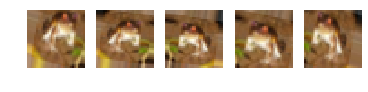

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()